In [1]:
import numpy as np
import statistics as stats
import pandas as pd
from sklearn import linear_model
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('2019.csv',',')
data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [3]:
X = data.drop(['Country or region','Overall rank'],axis=1) #Variables independientes de evaluación
Y = data[['Overall rank']] #Variable dependiente

Y

,Overall rank
0,1
1,2
2,3
3,4
4,5
...,...
151,152
152,153
153,154
154,155


In [4]:
entrenamiento_X,test_X,entrenamiento_Y,test_Y = train_test_split(X,Y, train_size = 0.5, random_state = 0)
print('Filas de entrenamiento:',len(entrenamiento_X),'\nFilas de testeo:',len(test_X))

Filas de entrenamiento: 78 
Filas de testeo: 78


In [5]:
#Regresión lineal 
linearReg = linear_model.LinearRegression()
linearReg.fit(entrenamiento_X,entrenamiento_Y)

#Lasso
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(entrenamiento_X,entrenamiento_Y);

#Arbol
treeRegressor = tree.DecisionTreeRegressor(max_depth=5)
treeRegressor.fit(entrenamiento_X,entrenamiento_Y);

In [6]:
#Predicción - Regresión Lineal
prediccionReg = linearReg.predict(test_X)

#Predicción - Lasso
prediccionLasso = lasso.predict(test_X)

#Predicción - Arboles
prediccionArbol = treeRegressor.predict(test_X)

In [7]:
print(len(test_X),"filas de testeo.")
print("LinearRegression:",linearReg.score(test_X,test_Y))
print("Lasso:",lasso.score(test_X,test_Y))
print("Tree Regressor:",treeRegressor.score(test_X,test_Y))

78 filas de testeo.
LinearRegression: 0.9777418664068573
Lasso: 0.9783377497330722
Tree Regressor: 0.9943233460717611


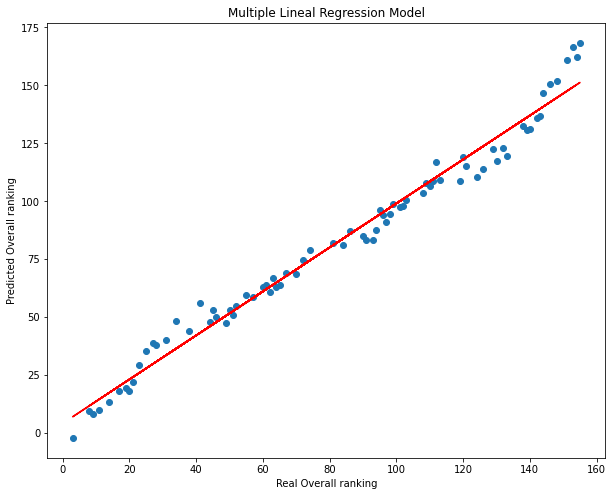

In [21]:
#Plot Visualización Regresión Lineal Multiple

plt.figure(figsize=(10,8))
plt.title('Multiple Lineal Regression Model')
plt.scatter(test_Y,prediccionReg)
plt.ylabel('Predicted Overall ranking')
plt.xlabel('Real Overall ranking')
#test_Y = test_Y.values.flatten()
m,b = np.polyfit(test_Y,prediccionReg,1)
recta = m*test_Y+b
plt.plot(test_Y, recta, color='red');

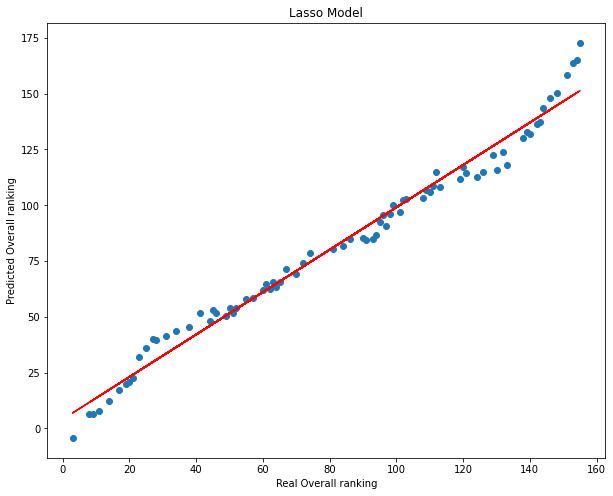

In [19]:
#Plot Visualización Lasso
m2, b2 = np.polyfit(test_Y, prediccionLasso, 1)
plt.figure(figsize=(10, 8))
plt.title('Lasso Model')
plt.ylabel('Predicted Overall ranking')
plt.xlabel('Real Overall ranking')
plt.scatter(test_Y, prediccionLasso)
plt.plot(test_Y, (m2*test_Y + b2),c='Red');

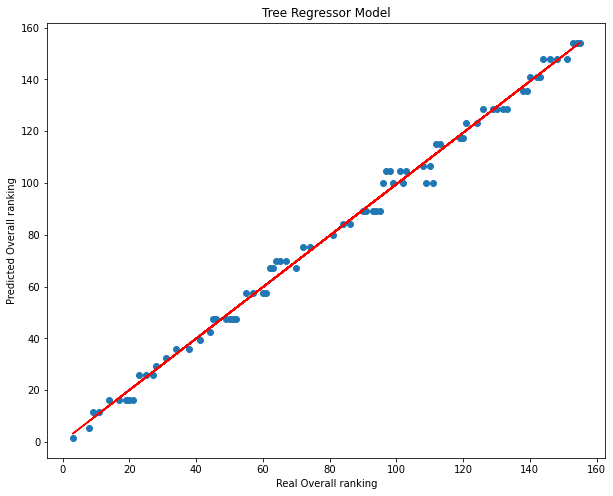

In [20]:
#Plot Visualización Tree Regressor
m3, b3 = np.polyfit(test_Y, prediccionArbol, 1)
plt.figure(figsize=(10, 8))
plt.title('Tree Regressor Model')
plt.ylabel('Predicted Overall ranking')
plt.xlabel('Real Overall ranking')
plt.scatter(test_Y, prediccionArbol)
plt.plot(test_Y, (m3*test_Y + b3),c='red');

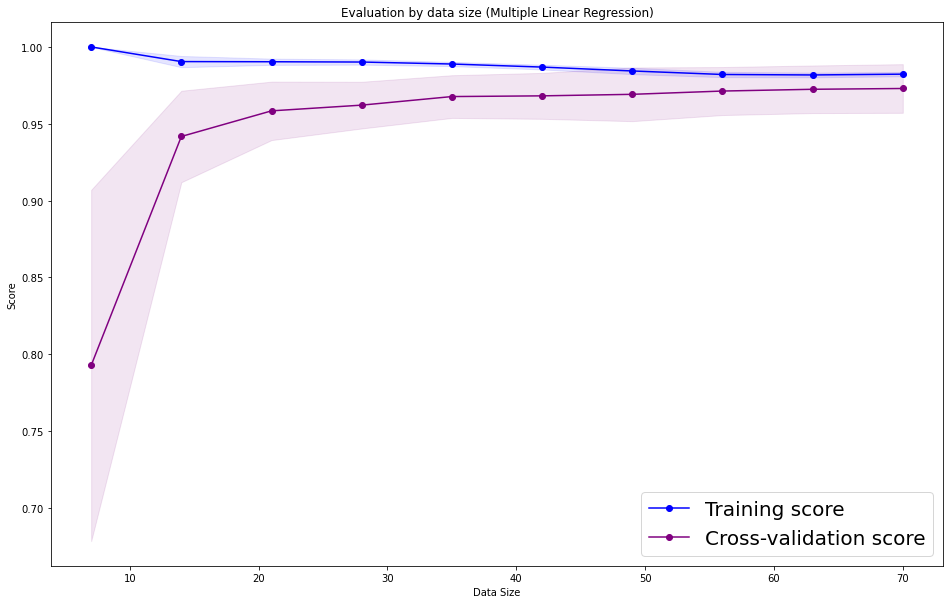

In [22]:
from sklearn.model_selection import learning_curve

#Multiple Linear Regression - Learning_Curve

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    linear_model.LinearRegression(),
    entrenamiento_X,
    entrenamiento_Y,
    cv=10,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    return_times=True,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

plt.figure(figsize=(16,10))
plt.plot(train_sizes, train_scores_mean, "-o", color="blue", label="Training score")
plt.fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha=0.1,color="blue")
plt.plot(train_sizes, test_scores_mean, "-o", color="purple", label="Cross-validation score")
plt.fill_between(train_sizes,test_scores_mean - test_scores_std,test_scores_mean + test_scores_std,alpha=0.1,color="purple")

plt.legend(loc ="lower right",prop={'size':20})
plt.title("Evaluation by data size (Multiple Linear Regression)")
plt.xlabel("Data Size")
plt.ylabel("Score");

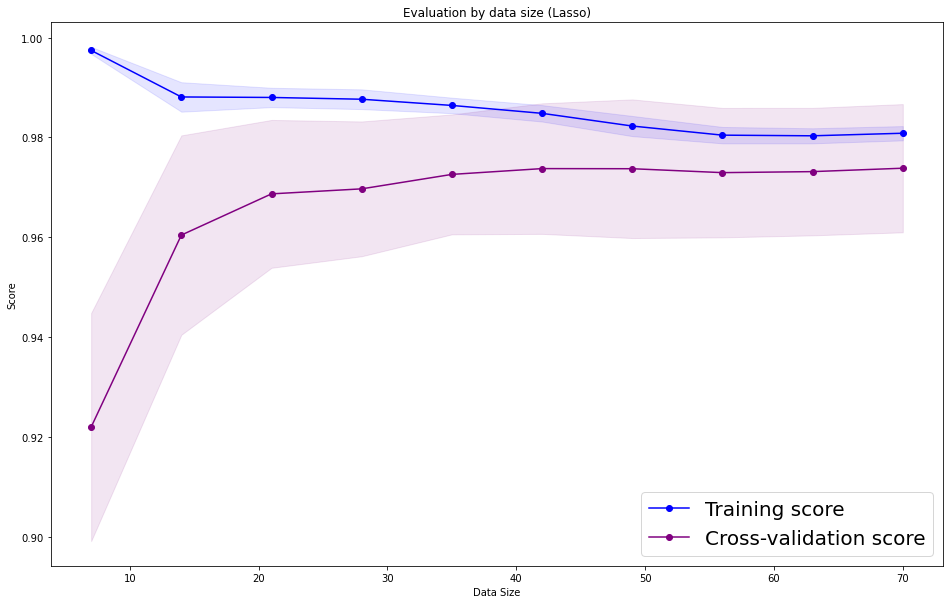

In [23]:
#Lasso - Learning_Curve

train_sizesA, train_scoresA, test_scoresA, fit_timesA, _ = learning_curve(
    linear_model.Lasso(alpha=0.1),
    entrenamiento_X,
    entrenamiento_Y,
    cv=10,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    return_times=True,
)
train_scores_meanA = np.mean(train_scoresA, axis=1)
train_scores_stdA = np.std(train_scoresA, axis=1)
test_scores_meanA = np.mean(test_scoresA, axis=1)
test_scores_stdA = np.std(test_scoresA, axis=1)
fit_times_meanA = np.mean(fit_timesA, axis=1)
fit_times_stdA = np.std(fit_timesA, axis=1)

plt.figure(figsize=(16,10))
plt.plot(train_sizesA, train_scores_meanA, "-o", color="blue", label="Training score")
plt.fill_between(train_sizesA,train_scores_meanA - train_scores_stdA,train_scores_meanA + train_scores_stdA,alpha=0.1,color="blue")
plt.plot(train_sizesA, test_scores_meanA, "-o", color="purple", label="Cross-validation score")
plt.fill_between(train_sizesA,test_scores_meanA - test_scores_stdA,test_scores_meanA + test_scores_stdA,alpha=0.1,color="purple")

plt.legend(loc ="lower right",prop={'size':20})
plt.title("Evaluation by data size (Lasso)")
plt.xlabel("Data Size")
plt.ylabel("Score");

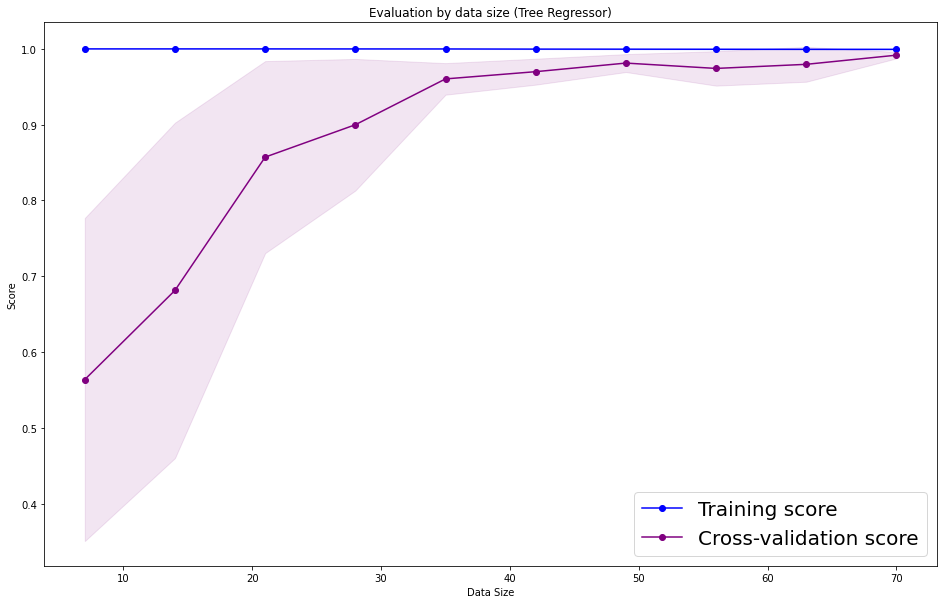

In [24]:
#Tree Regressor - Learning_Curve

train_sizesB, train_scoresB, test_scoresB, fit_timesB, _ = learning_curve(
    tree.DecisionTreeRegressor(max_depth=5),
    entrenamiento_X,
    entrenamiento_Y,
    cv=10,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    return_times=True,
)
train_scores_meanB = np.mean(train_scoresB, axis=1)
train_scores_stdB = np.std(train_scoresB, axis=1)
test_scores_meanB = np.mean(test_scoresB, axis=1)
test_scores_stdB = np.std(test_scoresB, axis=1)
fit_times_meanB = np.mean(fit_timesB, axis=1)
fit_times_stdAB = np.std(fit_timesB, axis=1)

plt.figure(figsize=(16,10))
plt.plot(train_sizesB, train_scores_meanB, "-o", color="blue", label="Training score")
plt.fill_between(train_sizesB,train_scores_meanB - train_scores_stdB,train_scores_meanB + train_scores_stdB,alpha=0.1,color="blue")
plt.plot(train_sizesB, test_scores_meanB, "-o", color="purple", label="Cross-validation score")
plt.fill_between(train_sizesB,test_scores_meanB - test_scores_stdB,test_scores_meanB + test_scores_stdB,alpha=0.1,color="purple")

plt.legend(loc ="lower right",prop={'size':20})
plt.title("Evaluation by data size (Tree Regressor)")
plt.xlabel("Data Size")
plt.ylabel("Score");

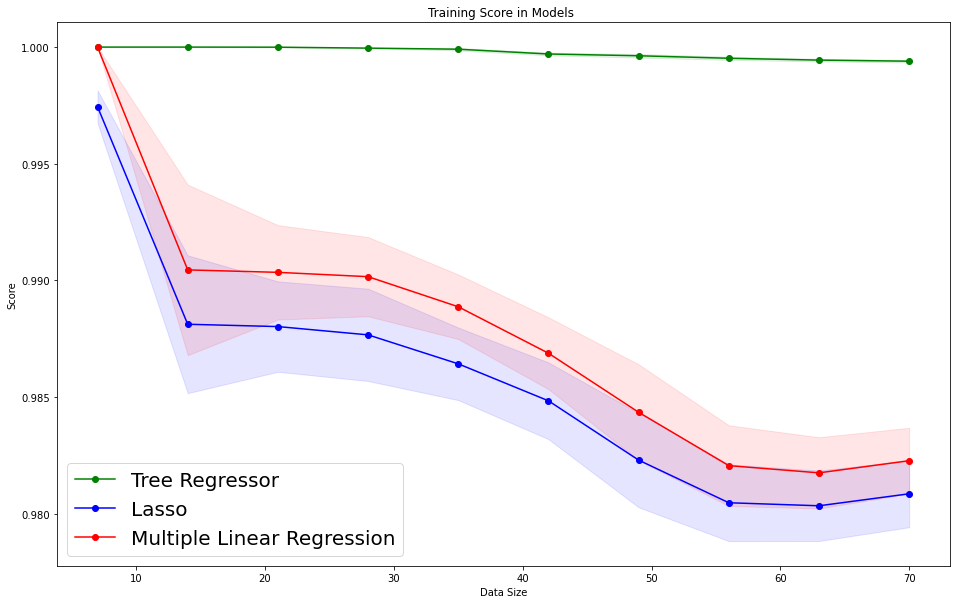

In [17]:
#Comparación de modelos - Training Score

plt.figure(figsize=(16,10))
plt.plot(train_sizesB, train_scores_meanB, "-o", color="green", label="Tree Regressor")
plt.fill_between(train_sizesB,train_scores_meanB - train_scores_stdB,train_scores_meanB + train_scores_stdB,alpha=0.1,color="green")

plt.plot(train_sizesA, train_scores_meanA, "-o", color="blue", label="Lasso")
plt.fill_between(train_sizesA,train_scores_meanA - train_scores_stdA,train_scores_meanA + train_scores_stdA,alpha=0.1,color="blue")

plt.plot(train_sizes, train_scores_mean, "-o", color="red", label="Multiple Linear Regression")
plt.fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha=0.1,color="red")

plt.legend(loc ="lower left",prop={'size':20})
plt.title("Training Score in Models ")
plt.xlabel("Data Size")
plt.ylabel("Score");

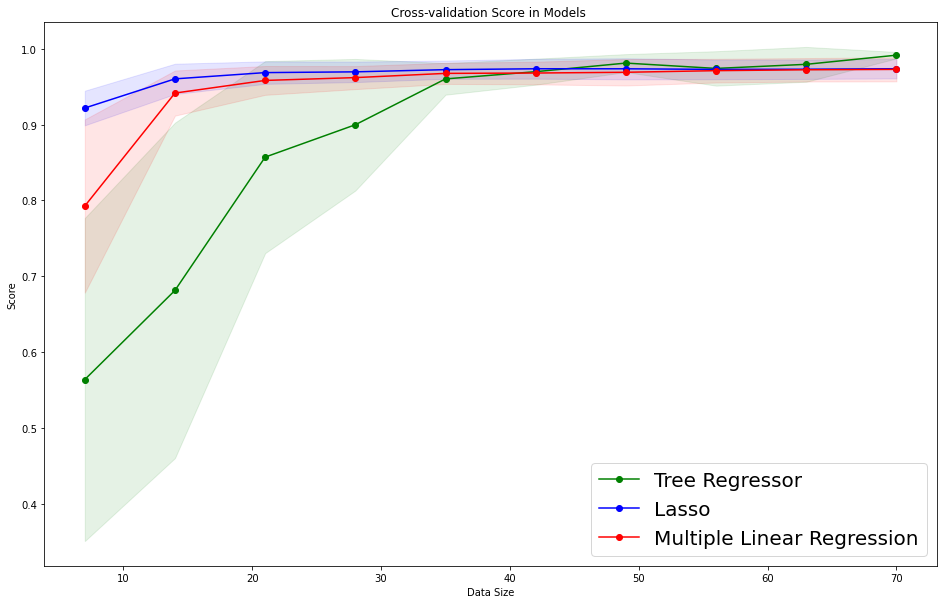

In [25]:
#Comparación de modelos - Cross-validation

plt.figure(figsize=(16,10))
plt.plot(train_sizesB, test_scores_meanB, "-o", color="green", label="Tree Regressor")
plt.fill_between(train_sizesB,test_scores_meanB - test_scores_stdB,test_scores_meanB + test_scores_stdB,alpha=0.1,color="green")

plt.plot(train_sizesA, test_scores_meanA, "-o", color="blue", label="Lasso")
plt.fill_between(train_sizesA,test_scores_meanA - test_scores_stdA,test_scores_meanA + test_scores_stdA,alpha=0.1,color="blue")

plt.plot(train_sizes, test_scores_mean, "-o", color="red", label="Multiple Linear Regression")
plt.fill_between(train_sizes,test_scores_mean - test_scores_std,test_scores_mean + test_scores_std,alpha=0.1,color="red")

plt.legend(loc ="lower right",prop={'size':20})
plt.title("Cross-validation Score in Models ")
plt.xlabel("Data Size")
plt.ylabel("Score");